Full name: ***Moldir Koishybayeva*** <br>

<h1 align="center"> <font color=#F9AB00><b><i>Mini Project</font></h4>

*This work was created in google colab.*<br>
*It will be appreciated if this platform will be used when running the code.*

####**Importing & Installing necessary libraries**

In [ ]:
from google.colab import output
!pip install PyDrive
!pip install umap-learn
!pip install mplcyberpunk
output.clear()

In [ ]:
import mplcyberpunk
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import pandas as pd
import plotly.graph_objects as graph_objects
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np
drive.mount('/content/drive') 

Mounted at /content/drive


####**Accessing google drive for uploading our data**

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1_sSVf6NUVhGGRYRBXhioxIftX8R4x32k'})   # replace the id with id of file you want to access
downloaded.GetContentFile('UCI_HAR_Dataset.zip') 

In [ ]:
!unzip /content/UCI_HAR_Dataset.zip
output.clear()

####**Data Preparation**

In [ ]:
X_train = pd.read_fwf('/content/UCI HAR Dataset/train/X_train.txt', header=None)
X_train.columns = pd.read_csv('/content/UCI HAR Dataset/features.txt', sep=" ", header=None)[1]
X_test = pd.read_fwf('/content/UCI HAR Dataset/test/X_test.txt', header=None)
X_test.columns = pd.read_csv('/content/UCI HAR Dataset/features.txt', sep=" ", header=None)[1]
X_dfs=[X_train, X_test]
X = pd.concat(X_dfs,ignore_index=True)

In [ ]:
X

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [ ]:
y_train = pd.read_fwf('/content/UCI HAR Dataset/train/y_train.txt', header=None)
y_test = pd.read_fwf('/content/UCI HAR Dataset/test/y_test.txt', header=None)
y_dfs=[y_train, y_test]
y = pd.concat(y_dfs,ignore_index=True)
y = y.rename(columns={0:'target'})

####**DBSCAN before**

In [ ]:
dbscan=DBSCAN(eps=5,min_samples=6) #epsilon value is changed after implementing PCA
dbscan.fit(X)
labels = dbscan.fit_predict(X)
np.unique(labels)
#-1 -> noise, DBSCAN defined only one cluster

array([-1,  0])

####**Dimensionality Reduction**


#####**PCA** 

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf.shape

(10299, 3)

In [ ]:
finalDf = pd.concat([principalDf, y], axis=1)
finalDf

,principal component 1,principal component 2,principal component 3,target
0,-16.392383,1.979406,3.441346,5
1,-15.593296,1.175288,-0.449886,5
2,-15.436910,2.246063,-1.427313,5
3,-15.662168,3.772916,-1.424793,5
4,-15.857151,4.450223,-1.968173,5
...,...,...,...,...
10294,10.151181,-6.464347,-1.137250,2
10295,12.123411,-4.851337,-0.718009,2
10296,11.831657,-3.393911,2.179497,2
10297,8.187779,-4.359549,1.204155,2


In [ ]:
fig = graph_objects.Figure()

for cluster in list(finalDf.target.unique()):
    fig.add_trace(graph_objects.Scatter3d(x = finalDf[finalDf['target'] == cluster]['principal component 1'],
                               y = finalDf[finalDf['target'] == cluster]['principal component 2'],
                               z = finalDf[finalDf['target'] == cluster]['principal component 3'],
                               mode = 'markers', marker=dict(size = 10, line_width = 2),
                               name = 'Cluster ' + str(cluster)))

fig.update_layout(title='Visualization of clusters', width=700, height=500, 
                  autosize = True, showlegend = True,
                  scene = dict(xaxis=dict(title = 'PCA 1'),
                               yaxis=dict(title = 'PCA 2'),
                               zaxis=dict(title = 'PCA 3')))
fig.layout.template = 'plotly_dark'
fig.show()

In [ ]:
print(finalDf.target.value_counts())

6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
Name: target, dtype: int64


#####**UMAP**

In [ ]:
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



In [ ]:
fig = graph_objects.Figure(data=[graph_objects.Scatter3d(x=reducer.embedding_[:, 0],y=reducer.embedding_[:, 1], z=reducer.embedding_[:, 2], 
                                   mode='markers',marker=dict(size=10,color=finalDf['target'], 
                                   colorscale='Rainbow',  opacity=1,line_width=1))])
fig.update_layout(title='Visualization of clusters from UMAP (reducer.embedding_)', width=700, height=500)
fig.layout.template = 'plotly_dark'
fig.show()

####**DBSCAN after**

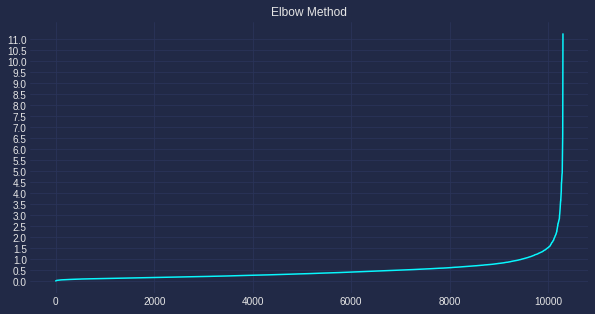

In [ ]:
plt.figure(figsize=(10,5))
plt.style.use('cyberpunk')
nn = NearestNeighbors(n_neighbors=6).fit(finalDf[['principal component 1','principal component 2','principal component 3']])
distances, idx = nn.kneighbors(finalDf[['principal component 1','principal component 2','principal component 3']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('Elbow Method')
plt.yticks(np.arange(0, max(distances), 0.5))
plt.plot(distances)
plt.show()

In [ ]:
dbscan=DBSCAN(eps=2.10,min_samples=6)
dbscan.fit(finalDf[['principal component 1','principal component 2','principal component 3']])
labels = dbscan.labels_
clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise = list(labels).count(-1)
print('Approximate # of clusters:',clusters)
print('Approximate # of noise:',noise)
finalDf['dbscan_labels']=labels.tolist()

Approximate # of clusters: 7
Approximate # of noise: 323


In [ ]:
fig = graph_objects.Figure()

for label in list(np.unique(labels)):
    fig.add_trace(graph_objects.Scatter3d(x = finalDf[finalDf['dbscan_labels'] == label]['principal component 1'],
                               y = finalDf[finalDf['dbscan_labels'] == label]['principal component 2'],
                               z = finalDf[finalDf['dbscan_labels'] == label]['principal component 3'],
                               mode = 'markers', marker=dict(size = 10, line_width = 2),
                               name = 'Cluster ' + str(label)))

fig.update_layout(title='DBSCAN - clusters from PCA', width=700, height=500, 
                  autosize = True, showlegend = True,
                  scene = dict(xaxis=dict(title = 'PCA 1'),
                               yaxis=dict(title = 'PCA 2'),
                               zaxis=dict(title = 'PCA 3')))
fig.layout.template = 'plotly_dark'
fig.show()